# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

NameError: ignored

In [ ]:
len(preprocessed_email)

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

In [ ]:
data.iloc[400]

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import os
import string
import nltk
from nltk.tree import Tree
from nltk import ne_chunk, pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tree import Tree
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    subject = ''
    text = ''
    #Process emails
    emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", Input_Text)
    words_in_email_list = []
    for email in emails:
        pos = email.find('@')
        substring = email[pos+1:] 
        x = substring.split('.')
        words_in_email_list.extend(x)
    all_email_string = ''
    for word in words_in_email_list:
        if len(word) > 2 and word.lower() != 'com':
            all_email_string += ' ' + word
    all_email_string = all_email_string[1:]
    list_of_preproessed_emails = all_email_string
    Input_Text = re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+"," ",Input_Text)
   
    #Process Subject
    sub = re.findall(r'^Subject.*$',Input_Text, re.MULTILINE) 
    sub=sub[0]
    sub=sub[8:]
    #Remove word before ':' and new line and tab
    sub_list = []
    temp = sub.split()
    for i in temp:
        if i.endswith(':'):
            pass
        else:
            sub_list.append(i)
    subject = ' '.join(sub_list)
    #Remove punctuations
    for i in string.punctuation:
        subject = subject.replace(i,"")

    Input_Text = re.sub(r'^Subject.*$'," ",Input_Text,flags=re.MULTILINE)
    
    #Process Text
    #Remove From:
    Input_Text = re.sub(r'^From.*$'," ",Input_Text,flags=re.MULTILINE)
    
    #Remove Write to:
    Input_Text = re.sub(r'^Write to.*$'," ",Input_Text,flags=re.MULTILINE)
    
    #Remove tags <>
    Input_Text = re.sub('<.*?>', '', Input_Text, flags=re.MULTILINE)
    
    #Remove brackets ()
    Input_Text = re.sub('\(.*?\)', '', Input_Text, flags=re.MULTILINE)
    
    #Remove word before ':'
    #Remove new line and tab 
    text_list = []
    temp = Input_Text.split()
    for i in temp:
        if i.endswith(':'):
            pass
        else:
            #Remove "_" from start and end of the words
            i = i.strip("_")
            #Remove "OneLetter_word"- eg: d_berlin, "TwoLetters_word" - eg: dr_berlin
            j = i.split("_")
            if len(j) > 1:
                if len(j[0]) > 2:
                    pass
                else:
                    i = j[1]
            #Remove words having length <= 2 and > 15
            if len(i) > 2 or len(i) < 15:
                text_list.append(i.lower())
    text = ' '.join(text_list)
    
    #Remove punctuations
    for i in string.punctuation:
        text = text.replace(i,"")
        
    #Decontraction
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    #Chunking
    chunks=[]
    chunks=(list(ne_chunk(pos_tag(word_tokenize(text)))))
    
    #Remove chunks which have label Person and combine GPE chunks
    for chunk in chunks:
        if type(chunk)==Tree:
            if chunk.label()=="PERSON":
                for word,pos in chunk.leaves():
                    text = re.sub(re.escape(word),"",text, flags=re.MULTILINE)
                    
            if chunk.label()=="GPE":
                leaves = chunk.leaves()
                if len(leaves)>1: 
                    place = "_".join([word for word,pos in leaves])
                    text = re.sub(rf'{leaves[1][0]}',place,text, flags=re.MULTILINE)              
                    text = re.sub(rf'\b{leaves[0][0]}\b',"",text, flags=re.MULTILINE)
    
    #Remove all digits from text
    text = re.sub(r'\d',"",text, flags=re.MULTILINE)
    
    #Replace all the words except "A-Za-z_" with space. 
    text = re.sub(r"[^a-zA-Z_]"," ",text) 
    
    #Remove extra spaces
    text = re.sub(r" {2,}"," ",text,flags=re.MULTILINE) 
    return (list_of_preproessed_emails,subject,text)

In [ ]:
get_ipython().system_raw("unrar x /content/drive/MyDrive/documents.rar")

In [ ]:
!unrar x "/content/drive/MyDrive/documents.rar" "/content/drive/MyDrive/documents"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/documents.rar

No files to extract


In [ ]:
directory = '/content/documents'
preproessed_emails = []
preproessed_subject = []
preproessed_text = []
actual_class_list = []
actual_text = []
# iterate over files in that directory
for filename in tqdm(os.listdir(directory)):
    actual_class = filename.split("_")[0]
    actual_class_list.append(actual_class)
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        pass
    else:
        continue
    f = open('/content/documents/'+filename, "r",errors='replace')
    #input_file_text = f.read()
    list_of_preproessed_emails,subject,text = preprocess(f.read())
    preproessed_emails.append(list_of_preproessed_emails)
    preproessed_subject.append(subject)
    preproessed_text.append(text)
    actual_text.append(f.read())

100%|██████████| 18828/18828 [23:39<00:00, 13.27it/s]


In [ ]:
#Creating data frame
data= {'text':actual_text,'class':actual_class_list,'preprocessed_text':preproessed_text,'preprocessed_subject':preproessed_subject,'preprocessed_emails':preproessed_emails}
df = pd.DataFrame(data)
df.head()

,text,class,preprocessed_text,preprocessed_subject,preprocessed_emails
0,,alt.atheism,let me see if i understand what you are saying...,Keith Schneider Stealth Poster,cco caltech edu mouse cmhnet org
1,,talk.politics.mideast,shut up andi,Civility,
2,,misc.forsale,i need a large dog cage the kind you use to ho...,Large dog cage,andrew cmu edu
3,,sci.space,in article lossfsececmuedu i saw in the newspa...,Jemison on Star Trek,aurora alaska edu fs7 ece cmu edu acad3 alaska...
4,,soc.religion.christian,be devoted to one another in brotherly love ho...,Daily Verse,gvg47 gvg tek


In [ ]:
df.iloc[400]

text                                                                     
class                                                      comp.windows.x
preprocessed_text       extract from the color readme file for anthony...
preprocessed_subject                          COLORS and X windows AIcons
preprocessed_emails                               kurango cit edu cit edu
Name: 400, dtype: object

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [ ]:
#Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model
df['preprocessed_x']= df['preprocessed_text'] + df['preprocessed_subject'] + df['preprocessed_emails']
X = np.array(df['preprocessed_x'])
y = np.array(df['class'])

In [ ]:
#Split the data into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

11033


Text(0.5, 1.0, 'Distribution of length of text')

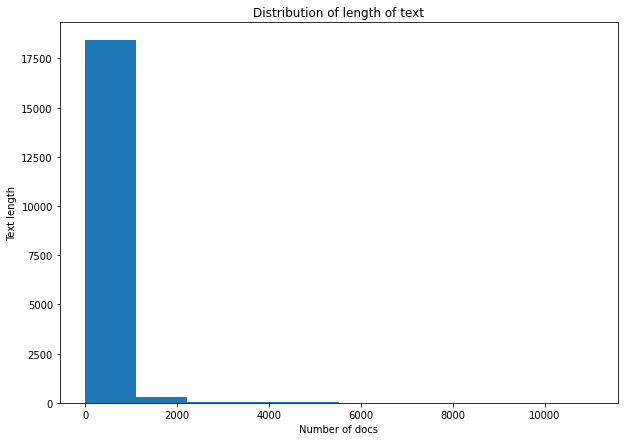

In [ ]:
# Analysis of distribution of length of text over dataset
length_of_text_list = []
for i in X:
    text_list = i.split()
    length_of_text_list.append(len(text_list))
print(max(length_of_text_list))
#Plot histogram for length of text distribution
fig,hist = plt.subplots(figsize=(10,7))
hist.hist(length_of_text_list)
plt.xlabel('Number of docs')
plt.ylabel('Text length')
plt.title('Distribution of length of text')

### Observation:
From above graph we can see that most of the documents have less than 1000 words and maximum words present in documents is 11033

In [ ]:
#Tokenization
t = Tokenizer(num_words=11033,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',) 
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
print("Vocab size is", vocab_size)

#Encode text
train_seq = t.texts_to_sequences(X_train)
test_seq = t.texts_to_sequences(X_test)

#Pad sequence to make them uniform length. Do padding upto 11033 length.
train_seq_with_padding = pad_sequences(train_seq, maxlen=11033, padding='post',truncating='post')
test_seq_with_padding = pad_sequences(test_seq, maxlen=11033, padding='post',truncating='post')

train_seq_with_padding = np.array(train_seq_with_padding)
test_seq_with_padding = np.array(test_seq_with_padding)
print(train_seq_with_padding.shape)
print(test_seq_with_padding.shape)
print(train_seq_with_padding[0])


Vocab size is 133567
(14121, 11033)
(4707, 11033)
[   8   22 1788 ...    0    0    0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

#Encode Y classes
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_le=encoder.transform(y_train)
y_test_le=encoder.transform(y_test)
print(y_train_le[0])

y_train_cat = utils.to_categorical(y_train_le,20)
y_test_cat = utils.to_categorical(y_test_le,20)
print(y_train_cat[0])
print(y_train_cat.shape)
print(y_test_cat.shape)

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(14121, 20)
(4707, 20)


### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [ ]:
#Loading glove vectors
import pickle

with open('/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

embedding_matrix = np.zeros((vocab_size,300))
for word,index in t.word_index.items():
  if word in glove_words:
    vec = model[word]
    embedding_matrix[index] = vec

In [ ]:
# Model 1
input_layer = tf.keras.layers.Input((11033,))
embedding_layer = tf.keras.layers.Embedding(vocab_size,300,weights=[embedding_matrix],input_length=11033,trainable=False)(input_layer)
conv1 = tf.keras.layers.Conv1D(16, 6, activation='relu', padding='same')(embedding_layer)
conv2 = tf.keras.layers.Conv1D(16, 4, activation='relu', padding='same')(embedding_layer)
conv3 = tf.keras.layers.Conv1D(16, 2, activation='relu', padding='same')(embedding_layer)

concatenate_layer1 = tf.keras.layers.Concatenate()([conv1,conv2,conv3])
max_pool1 = tf.keras.layers.MaxPool1D(pool_size=(4), strides=(2), padding='same')(concatenate_layer1)

conv4 = tf.keras.layers.Conv1D(14, 6, activation='relu', padding='same')(max_pool1)
conv5 = tf.keras.layers.Conv1D(14, 4, activation='relu', padding='same')(max_pool1)
conv6 = tf.keras.layers.Conv1D(14, 2, activation='relu', padding='same')(max_pool1)

concatenate_layer2 = tf.keras.layers.Concatenate()([conv4,conv5,conv6])
max_pool2 = tf.keras.layers.MaxPool1D(pool_size=(4), strides=(2), padding='same')(concatenate_layer2)

conv7 = tf.keras.layers.Conv1D(12, 4, activation='relu', padding='same')(max_pool2)

flatten_layer = tf.keras.layers.Flatten()(conv7)

dropout_layer = tf.keras.layers.Dropout(0.5)(flatten_layer)
dense_layer = tf.keras.layers.Dense(10, activation='relu')(dropout_layer)

output_layer = tf.keras.layers.Dense(20,activation='softmax')(dense_layer)

model_1 = keras.Model(input_layer, output_layer)
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11033)]      0           []                               
                                                                                                  
 embedding (Embedding)          (None, 11033, 300)   40070100    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 11033, 16)    28816       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 11033, 16)    19216       ['embedding[0][0]']              
                                                                                              

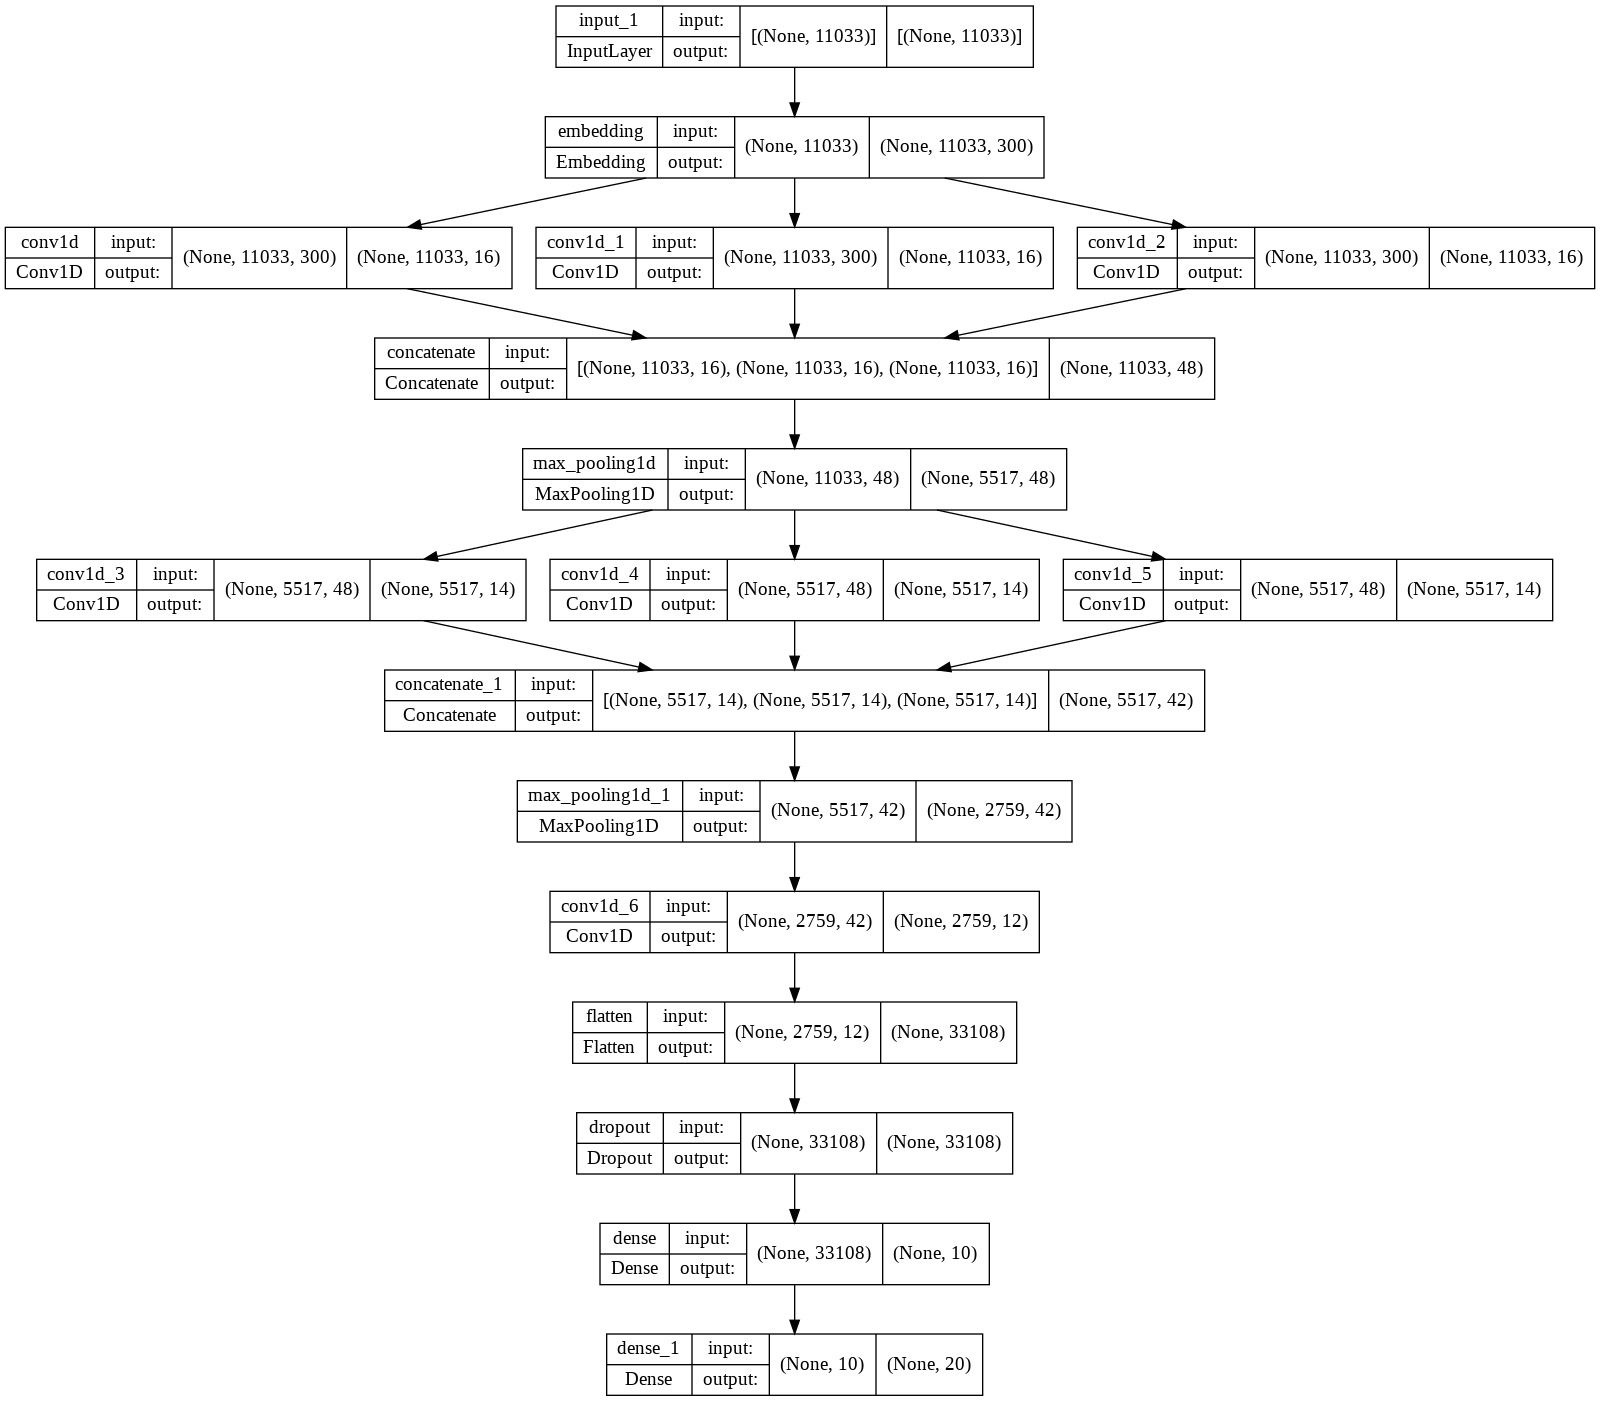

In [ ]:
#Plotting model
keras.utils.plot_model(model_1, 'model_1.png', show_shapes=True)

In [ ]:
#Training model
import tensorflow_addons as tfa

tf.keras.backend.clear_session() 
! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%load_ext tensorboard
%tensorboard --logdir $logdir

checkpoint_path = "'best_model_1.h5'"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1,write_graph=True,write_grads=True)
modelCheckPoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',  verbose=1, save_best_only=True, mode='max') 
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001,patience=2, verbose=1)

callback_list=[tensorboard_callback,modelCheckPoint_callback,earlystopping_callback]

model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc',tfa.metrics.F1Score(num_classes=20,average='micro',threshold=0.5)])
model_1.fit(train_seq_with_padding, y_train_cat, batch_size=16, epochs=20, validation_data=(test_seq_with_padding,y_test_cat),callbacks=callback_list)

NameError: ignored

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 12.6 MB/s 


### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [ ]:
#Prepare data for Model 2
#For char cnn data should not be preprocessed
X2 = np.array(df['text'])
X2 = [s.lower() for s in X2]
y2 = np.array(df['class'])

#Split the data into Train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, stratify=y)

#Encode Y classes
y2_train_cat = utils.to_categorical(y2_train)
y2_test_cat = utils.to_categorical(y2_test)
print(y2_train_cat.shape)
print(y2_test_cat.shape)

In [ ]:
#https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33
#Tokenization for model 2
token = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
token.fit_on_texts(X2_train)

alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{} "
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
token.word_index = char_dict.copy()

# Add 'UNK'(unknown) to the vocabulary
token.word_index[token.oov_token] = max(char_dict.values()) + 1
vocab_size= len(token.word_index)

# integer encode the documents
train2_sequence2 = token.texts_to_sequences(X2_train)
test2_sequence2 = token.texts_to_sequences(X2_test)

#Get maximum chars in one coc
char_length_list = []
for i in X2_train:
  char_count = 0
  for char in i:
    char_count += 1
  char_length_list.append(char_count)
print(max(char_length_list))
max_length=max(char_length_list)

# pad documents to a max length of max_length
train2_seq_with_padding = pad_sequences(train2_sequence2, maxlen=max_length, padding='post',truncating='post')
test2_seq_with_padding = pad_sequences(test2_sequence2, maxlen=max_length, padding='post',truncating='post')

train2_seq_with_padding = np.array(train2_seq_with_padding)
test2_seq_with_padding = np.array(test2_seq_with_padding)

print(train2_seq_with_padding.shape)
print(test2_seq_with_padding.shape)

In [ ]:
#Embedding matrix
embedding_weights = []
embedding_weights.append(np.zeros(vocab_size))
for char, i in token.word_index.items():
  onehot= np.zeros(vocab_size)
  onehot[i-1]=1
  embedding_weights.append(onehot)
embedding_weights= np.array(embedding_weights)

In [ ]:
#Model 2 architecture
input_layer = tf.keras.layers.Input((max_length,))
emedding_layer = tf.keras.layers.Embedding(vocab_size+1,vocab_size, weights=[embedding_weights], trainable=False)(input_layer)

conv1= tf.keras.layers.Conv1D(16, 6, activation='relu')(emedding_layer)
conv2= tf.keras.layers.Conv1D(16, 4, activation='relu')(conv1)

max_pool1= tf.keras.layers.MaxPool1D(pool_size=(4), padding='same')(conv2)

conv3= tf.keras.layers.Conv1D(16, 4, activation='relu')(max_pool1)
conv4= tf.keras.layers.Conv1D(16, 2, activation='relu')(conv3)

max_pool2= tf.keras.layers.MaxPool1D(pool_size=(4),padding='same')(conv4)

flatten_layer=tf.keras.layers.Flatten()(max_pool2)
dropout_layer = tf.keras.layers.Dropout(0.5)(flatten_layer)
dense_layer = tf.keras.layers.Dense(10, activation='relu')(dropout_layer)
output_layer = layers.Dense(20,activation='softmax')(dense_layer)

model_2 = keras.Model(input_layer, output_layer)
keras.utils.plot_model(model_2, 'model_2.png', show_shapes=True)

In [ ]:
#Training model 2
tf.keras.backend.clear_session() 
! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%load_ext tensorboard
%tensorboard --logdir $logdir

checkpoint_path = "'best_model_2.h5'"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1,write_graph=True,write_grads=True)
modelCheckPoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',  verbose=1, save_best_only=True, mode='max') 
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001,patience=2, verbose=1)

callback_list=[tensorboard_callback,modelCheckPoint_callback,earlystopping_callback]

model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc',tfa.metrics.F1Score(num_classes=20,average='micro',threshold=0.5)])
model_2.fit(train2_seq_with_padding, y2_train_cat, batch_size=16, epochs=20, validation_data=(test2_seq_with_padding,y2_test_cat),callbacks=callback_list)